In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
traffic=pd.read_excel('C:/Users/Administrator/Desktop/assignment file.xlsx')

In [4]:
traffic

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died
0,1,24,Male,Bussinesman,On the way,After 1 hour,Yes,No,Scooter,1.0,Rider
1,2,63,Male,Retired Person,Hospital,After 120 hours,Yes,No,Scooty,120.0,Rider
2,3,23,Female,Student,Spot,Immediately,Yes,No,Scooter,NaN,Pillion
3,4,41,Female,Student,Hospital,After 144 hours,Yes,Na,Kinetic Honda,144.0,Rider
4,5,25,Male,Employee,Hospital,After 192 hours,Yes,Yes,RX 100,192.0,Rider
5,6,61,Male,Retired Person,Spot,Immediately,No,No,Scooter,NaN,Rider
6,7,35,Male,Bussinesman,Spot,Immediately,No,No,Hero Honda,NaN,Rider
7,8,27,Male,Bussinesman,Hospital,Immediately,Yes,No,Scooter,NaN,Rider
8,9,38,Male,Bussinesman,Spot,Immediately,No,No,Scooter,NaN,Rider
9,10,48,Male,Bussinesman,Hospital,After 2 hours,No,No,Kinetic Honda,2.0,Rider


#### 1) How many children (<= 18 years) have died in the accident and how many of them are males and females?

In [5]:
traffic[traffic['Age (yrs)']<=18]['Gender'].value_counts()

Male      6
Female    2
Name: Gender, dtype: int64

#### 2) How many children had taken alcohol? Were they riders or pillion when they died?

In [6]:
traffic[(traffic['Age (yrs)']<=18) & (traffic['Alco,Drug etc']=='Yes')]['Person died'].value_counts()

Pillion    2
Rider      1
Name: Person died, dtype: int64

#### 3) How many children have died immediately in the accident as pillion riders who had consumed alcolhol?

In [7]:
traffic[(traffic['Age (yrs)']<=18) & (traffic['Alco,Drug etc']=='Yes')&(traffic['Person died']=='Pillion')]['Time of death'].value_counts()

Immediately    2
Name: Time of death, dtype: int64

#### 4) How many have died under the influence of alcohol/drug and without wearing helmet?

In [8]:
traffic[(traffic['Alco,Drug etc']=='Yes')&(traffic['Use of helmet']=='No')]['Serial number'].count()

19

#### 5) How many of them have died between the age group of 31 - 40 years inspite of wearing helmet?

In [9]:
c=list(range(31,41))
traffic[(traffic['Age (yrs)'].isin(c))&(traffic['Use of helmet']=='Yes')]['Serial number'].count()

2

#### 6) What is the ratio of male and female who died on the spot?

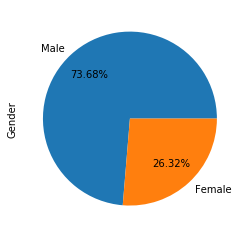

In [20]:
traffic[traffic['Site of death']=='Spot']['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',pctdistance=0.7)
# pie chart

#### 7) Whai is the medianal survival time  and IQR of RTA victims who died in the hospital?

In [65]:
death=''
for i in traffic['Time of death']:
    death=death+i

vic=re.findall('\d{1,3}',death)
vic1=[]
for i in vic:
    vic1.append(int(i))
x=np.array(vic1)
x
    
    

array([  1, 120, 144, 192,   2, 236, 240, 260, 284,   3,  36,   5,   5,
         5,   6,  72,  72,  72,  96,  72,   3,  72,  48, 240, 144])

In [67]:
np.median(vic1)


72.0

In [74]:
ss=pd.Series(x)
ss.describe()


count     25.000000
mean      97.200000
std       94.552014
min        1.000000
25%        5.000000
50%       72.000000
75%      144.000000
max      284.000000
dtype: float64

In [76]:
IQR=144-5
print(IQR)

139


#### 8) How many of them have died in the hospital for whom wearing of helmet details not available? Do you think these people could have wore helmet at the time of accident?

In [82]:
traffic[(traffic['Site of death']=='Hospital') & (traffic['Use of helmet']=='Na')]['Serial number'].count()

6

#### No they cant wore helmet at the time of accident

#### 9) What is the medianal period of coma (hrs) and IQR of RTA victims who died in the hospital?

In [102]:
coma=[]
xy=traffic['Period of coma (hrs)'].dropna()
for i in xy:
    coma.append(int(i))
np.median(coma)

72.0

In [104]:
xz=pd.Series(coma)
xz.describe()

count     25.000000
mean     105.200000
std      112.339144
min        1.000000
25%        5.000000
50%       72.000000
75%      144.000000
max      384.000000
dtype: float64

In [106]:
iqr=144-5
iqr

139

#### 10) What is the ratio of students to bussinessmen who died in RTA under the influence of alcohol?

In [109]:
traffic[(traffic['Occupation']=='Student')&(traffic['Alco,Drug etc']=='Yes')]['Serial number'].count()

6

In [110]:
traffic[(traffic['Occupation']=='Bussinesman')&(traffic['Alco,Drug etc']=='Yes')]['Serial number'].count()

5

## ratio of bussinesman:student=5:6

#### 11) State some of the hypothesis which may be formulated based on this data?  And test these hypothesis 

## riders & pillion death is independent of alcohol
* H0: rider&pillion death are independent of alchol
* H1: riders & pillion  are dependent of alcohol


In [120]:
tble=pd.crosstab(index=traffic['Person died'],columns=traffic['Use of helmet'])
tble.drop('Na',axis=1,inplace=True)
tble

Use of helmet,No,Yes
Person died,,
Pillion,8,0
Rider,28,3
Rider with Pillion,1,0


In [121]:
from scipy.stats import chi2_contingency
chi2_contingency(tble)

(0.9415867480383607, 0.6245066043705507, 2, array([[ 7.4  ,  0.6  ],
        [28.675,  2.325],
        [ 0.925,  0.075]]))

In [125]:
tble2=tble.drop(['Rider with Pillion'])
tble2

Use of helmet,No,Yes
Person died,,
Pillion,8,0
Rider,28,3


In [124]:
chi2_contingency(tble2)

(0.029485887096774206,
 0.8636619455276243,
 1,
 array([[ 7.38461538,  0.61538462],
        [28.61538462,  2.38461538]]))

## alcohol & drug is independent of occupation
* H0: occupation is independent of alcohol and drugs
* H1: occupation is dependent of alcohol and drugs

In [126]:
tble1=pd.crosstab(index=traffic['Occupation'],columns=traffic['Alco,Drug etc'])
tble1

"Alco,Drug etc",No,Yes
Occupation,,
Advocate,1,0
Bussinesman,10,5
Carpenter,0,1
Employee,1,4
House Wife,1,0
Mechanic,1,1
Polic constable,0,1
Priest,1,0
Rag picker,0,1


In [127]:
chi2_contingency(tble1)

(12.224906065485776, 0.34697745844137423, 11, array([[0.54, 0.46],
        [8.1 , 6.9 ],
        [0.54, 0.46],
        [2.7 , 2.3 ],
        [0.54, 0.46],
        [1.08, 0.92],
        [0.54, 0.46],
        [0.54, 0.46],
        [0.54, 0.46],
        [2.16, 1.84],
        [8.64, 7.36],
        [1.08, 0.92]]))

## Accept the null hypothesis

## Gender is independent of alcohol and drugs consumption
* H0:Gender is independent of alcohol and drugs consumption
* H1:Gender is dependent of alcohol and drugs consumption

In [129]:
tble3=pd.crosstab(index=traffic['Gender'],columns=traffic['Alco,Drug etc'])
tble3

"Alco,Drug etc",No,Yes
Gender,,
Female,4,6
Male,23,17


In [130]:
chi2_contingency(tble3)

(0.4076086956521739, 0.5231857390945609, 1, array([[ 5.4,  4.6],
        [21.6, 18.4]]))

## Accept the null hypothesis

## Is gender is independent of type of vehicle they are using
* H0: gender is independent of type of vehicle they are using
* H1: gender is dependent of type of vehicle they are using

In [136]:
tble4=pd.crosstab(index=traffic['Type of vehicle'],columns=traffic['Gender'])
tble4

Gender,Female,Male
Type of vehicle,,
Hero Honda,0,5
Kinetic Honda,2,4
RX 100,4,10
Scooter,2,13
Scooty,0,2
TVS 50,2,3
TVS Suzuki,0,2
Yezdi,0,1


In [137]:
chi2_contingency(tble4)

(5.476190476190476, 0.6020572836146408, 7, array([[ 1. ,  4. ],
        [ 1.2,  4.8],
        [ 2.8, 11.2],
        [ 3. , 12. ],
        [ 0.4,  1.6],
        [ 1. ,  4. ],
        [ 0.4,  1.6],
        [ 0.2,  0.8]]))

## Accept the null hypothesis

## No there is not sufficient data to test the hypothesis, we cant perform any parametric test on the data,we cant use central limit theorem to convert data to standard normal curve 

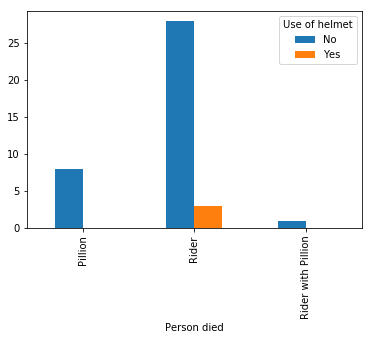

In [141]:
from matplotlib import pyplot as plt
tble.plot(kind='bar')

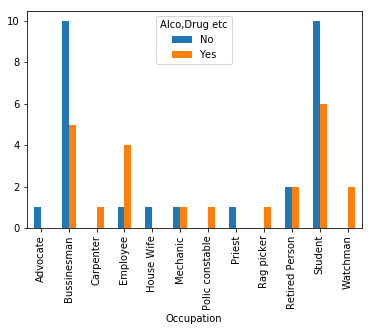

In [142]:
tble1.plot(kind='bar')

In [27]:
occu = pd.DataFrame(traffic['Occupation'].value_counts()).reset_index()
occu

,index,Occupation
0,Student,16
1,Bussinesman,15
2,Employee,5
3,Retired Person,4
4,Mechanic,2
5,Watchman,2
6,Carpenter,1
7,Advocate,1
8,Rag picker,1
9,Priest,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

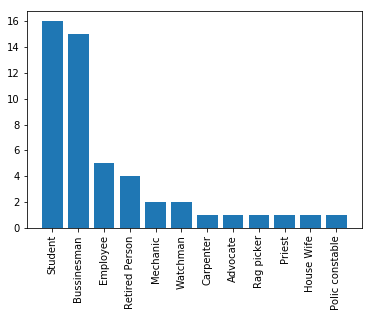

In [29]:
plt.bar(occu['index'],occu['Occupation'])
plt.xticks(rotation=90)

In [30]:
Age_Cat=traffic['Age (yrs)'].apply(lambda x:"Childern" if x<=18 else ("Young" if x>=19 and x<=30 else("Elders" if x>=31 and x<=45 else "Older")))

In [32]:
Age_Death_loc=pd.crosstab(traffic['Site of death'],Age_Cat)
Age_Death_loc

Age (yrs),Childern,Elders,Older,Young
Site of death,,,,
Hospital,3,9,5,8
On the way,3,1,0,2
Spot,2,9,2,6


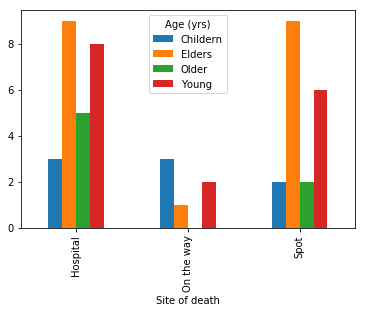

In [33]:
Age_Death_loc.plot(kind='bar')

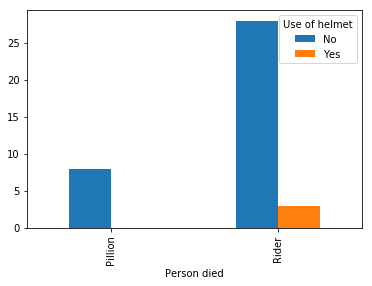

In [143]:
tble2.plot(kind='bar')

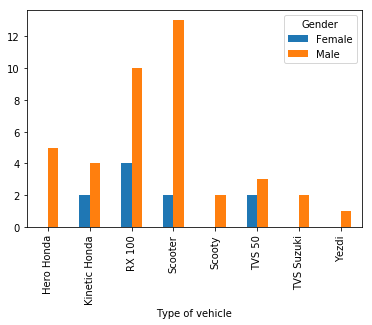

In [144]:
tble3.plot(kind='bar')

In [145]:
traffic.isnull().sum()

Serial number            0
Age (yrs)                0
Gender                   0
Occupation               0
Site of death            0
Time of death            0
Alco,Drug etc            0
Use of helmet            0
Type of vehicle          0
Period of coma (hrs)    25
Person died              0
dtype: int64

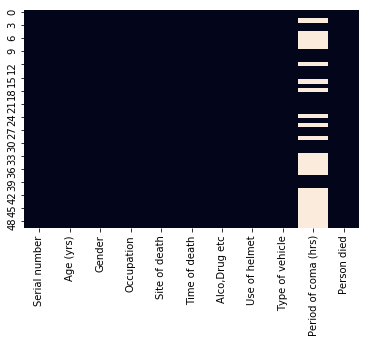

In [146]:
import seaborn as sns 
from matplotlib import pyplot as plt
sns.heatmap(traffic.isnull(),cbar=False)

#### 14) What are the different types of vehicles used?

In [148]:
traffic['Type of vehicle'].value_counts()

Scooter          15
RX 100           14
Kinetic Honda     6
TVS 50            5
Hero Honda        5
TVS Suzuki        2
Scooty            2
Yezdi             1
Name: Type of vehicle, dtype: int64